Escriba un programa que encuentre la senda óptima de Ct y At de Leo Messi a lo largo de su vida, dadas unas sendas de ingreso Y, un valor para la tasa de interés bruta R y un valor de phi.

In [1]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import operator
import scipy
import random

In [2]:
## Inicialización de las variables
beta   = 0.98   # Factor de descuento de Leo
sigma  = 1.5      # Coeficiente de aversion al riesgo de Messi
T      = 70     # Horizonte de vida que le queda a la pulga
A_0=np.array([0])      # Valor inicial de sus activos
A_T=np.array([0])      # Herencia que deja Leo a Thiago Messi

In [3]:
R1 = 1/beta-0.02 # Perfil de consumo creciente (Se endeuda)
R2 = 1/beta+0.02 # Perfil de consumo decreciente (Ahorra)
R3 = 1/beta      # Perfil de consumo constante a traves del tiempo

In [4]:
## Creamos un Vector de los ingresos de Leo
Y=np.ones(T+1)

In [5]:
# Descomente el siguiente bloque para simular un proceso de ingreso mas
# complicado donde el FC Barcelona sube a Leo su sueldo anualmente
g = 0.04 # Tasa de crecimiento del ingreso
for i in range(1,T+1):
    Y[i]=(1+g)*Y[i-1]

for t in range(40,T+1): #Asumimos que se retira a los 40
       Y[t]=0            

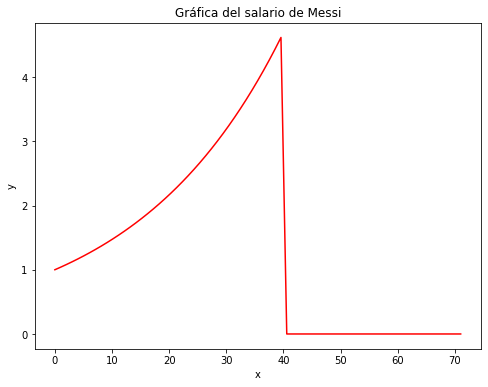

In [6]:
# get 10 linearly spaced points in the interval [0, 5)
x = np.linspace(0, T+1, T+1)
y = Y

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'r')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Gráfica del salario de Messi")
plt.show()

In [7]:
#Definimos la función de utilidad instantánea de Messi
def ut(C):
    if (sigma==1):
        utilidad=np.log(C)
    else:
        utilidad=(C**(1-sigma)-1)/(1-sigma)
    return (utilidad)

In [8]:
#Función objetivo de Messi
## Funcion objetivo de Leo

def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec) # Vector con el rezago de los acivos
    A_vec = np.append(A_vec,A_T) # Vector de activos
    C_vec = R1*A_vec_lag+Y-A_vec # Vector de consumo en cada periodo
    beta_vec = beta**np.arange(0,T+1)  # Vector con tasas de descuento
    bienestar = sum(beta_vec*ut(C_vec))
    
    return(-bienestar)

In [9]:
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma=1
sigma=1
Y_bar=sum(Y/(R1**np.arange(0,T+1))) #Esto es el valor presente del ingreso de Leo

# Consumo

C0=((1-beta)/(1-beta**(T+1)))*Y_bar
C_initval=((beta*R1)**np.arange(0,T+1))*C0

#Activos
A_initval=np.ones(T) #Creamos el vector de activos iniciales una lista vacía
A_initval[0] = R1*A_0+Y[0]-C_initval[0]

A_initval[0]=R1*A_0+Y[0]-C_initval[0] #El vector inicial en su primera posición es
#El vector de activos iniciales mas los ingresos menos los consumos iniciales

for t in range(1,T):
    A_initval[t]=R1*A_initval[t-1]+Y[t]-C_initval[t]
    
#El vector de activos desde el segundo período hasta uno antes de su
#muerte, es la tasa de interes de sus activos del período pasado, más
#los ingresos del período correspondiente menos sus consumos

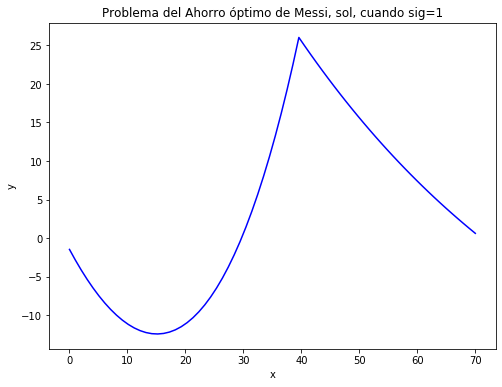

In [10]:
# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = A_initval

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema del Ahorro óptimo de Messi, sol, cuando sig=1")
plt.show()

In [24]:
#Importamos scipy y usamos import minimize para importar el método que minimiza funciones
from scipy.optimize import minimize
from scipy.optimize import fmin
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma!=1

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial

X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumo=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumo[0] = A_0*R1+Y[0]-resultados[0]

    else:
        consumo[t] = resultados[t-1]*R1+Y[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función

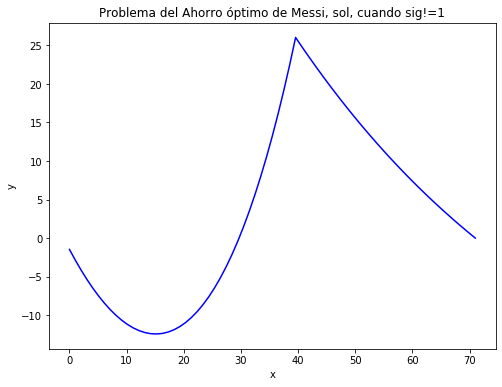

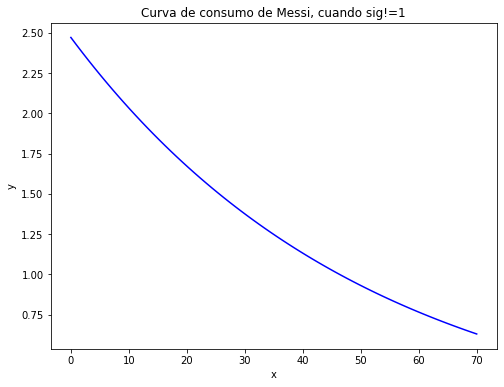

In [12]:
#Gráfica del consumo de Messi

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T+1, T+1)
y = resultados

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema del Ahorro óptimo de Messi, sol, cuando sig!=1")
plt.show()

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = consumo

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Curva de consumo de Messi, cuando sig!=1")
plt.show()

In [13]:
# Problema de Ahorro de Messi, solucion con restricciones de deuda

# Supongamos ahora que el malvado gobierno espanol,al servicio del Real
#Madrid, decide atacar a Leo con un proceso por fraude fiscal. 
# Esto impide al mejor de la historia contraer deudas por encima de 
#un umbral A_bound, incluso con su amigo Mascherano

# Por lo anterior, At>=A_bound en todo periodo

A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumo2=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2[0] = A_0*R1+Y[0]-resultados2[0]
    else:
        consumo2[t] = resultados2[t-1]*R1+Y[t]-resultados2[t]

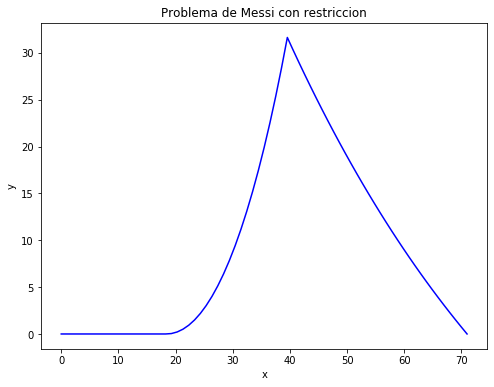

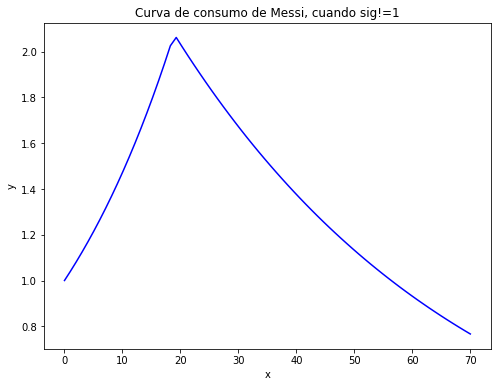

In [14]:
##Gráfica del problema

#Gráfica del consumo de Messi

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T+1, T+1)
y = resultados2

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema de Messi con restriccion")
plt.show()

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = consumo2

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Curva de consumo de Messi, cuando sig!=1")
plt.show()


Asuma que Yt = Y = 1 para todo t y que phi tiende a infinito. En una misma gráfica, muestre las sendas
de Ct y At cuando
A. R = 1/beta 
B. R = 1/beta -0.02
C. R = 1/beta + 0:02

In [15]:
#Importamos scipy y usamos import minimize para importar el método que minimiza funciones
from scipy.optimize import minimize
from scipy.optimize import fmin
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma!=1

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial

X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumoa=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumoa[0] = A_0*R3+Y[0]-resultados[0]

    else:
        consumoa[t] = resultados[t-1]*R3+Y[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función

consumob=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumob[0] = A_0*R1+Y[0]-resultados[0]

    else:
        consumob[t] = resultados[t-1]*R1+Y[t]-resultados[t]

consumoc=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumoc[0] = A_0*R2+Y[0]-resultados[0]

    else:
        consumoc[t] = resultados[t-1]*R2+Y[t]-resultados[t]

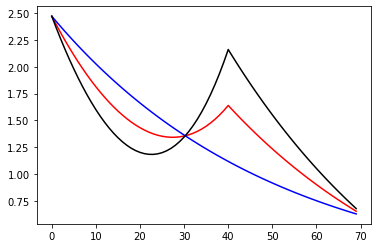

In [16]:
plt.plot(consumoa,'red')
plt.plot(consumob,'blue')
plt.plot(consumoc,'black')

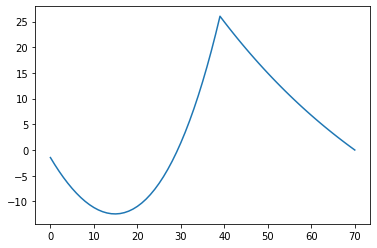

In [17]:
#Senda del ahorro 
plt.plot(resultados)

Asuma que Argentina ha declarado default (como siempre), por lo que Leo ya no cuenta con acceso a los mercados de deuda. Esto es, phi = 0. Asuma de nuevo que Yt = Y = 1 y muestre,
en una misma gráfica, las sendas de Ct y At cuando
(A) R = 1 / beta
(B) R = 1/beta -0.02
(C) R = 1/beta +0.02

In [18]:
A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumo2a=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2a[0] = A_0*R3+Y[0]-resultados2[0]
    else:
        consumo2a[t] = resultados2[t-1]*R3+Y[t]-resultados2[t]

consumo2b=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2b[0] = A_0*R1+Y[0]-resultados2[0]
    else:
        consumo2b[t] = resultados2[t-1]*R1+Y[t]-resultados2[t]        
        
consumo2c=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2c[0] = A_0*R2+Y[0]-resultados2[0]
    else:
        consumo2c[t] = resultados2[t-1]*R2+Y[t]-resultados2[t]               

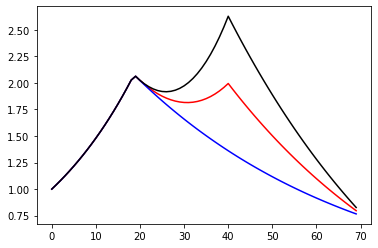

In [19]:
plt.plot(consumo2a,'red')
plt.plot(consumo2b,'blue')
plt.plot(consumo2c,'black')

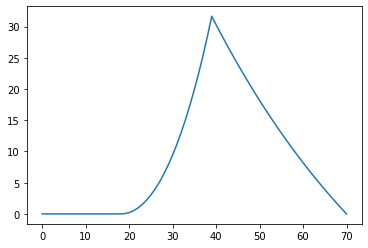

In [20]:
plt.plot(resultados2)

## Asuma que Yt es un proceso AR(1)
### Y1=mu=1 rho=0.8 y SD eps =0.2

In [21]:
#Función que simula el proceso AR(1)
mediaeps=0
sigmaeps=0.2
mu=1
rho=0.8
y0=1

random.seed(5)
epsilon=np.random.normal(mediaeps,sigmaeps**2,T)

def AR1(rho,mu,y0,nT,epsilon):
    y=np.ones(T)
    y[0] = y0
    
    for t in range(1,nT):
        y[t]=mu*(1-rho)+rho*y[t-1]+epsilon[t]
    return(y)    

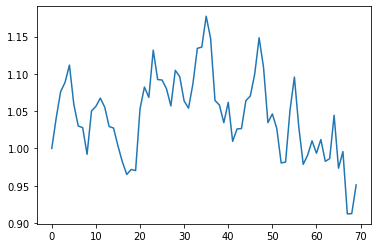

In [22]:
#Generamos el proceso AR1 para el ingreso
y_sim=AR1(rho,mu,y0,T,epsilon)
plt.plot(y_sim)

## Inciso a

In [31]:
#Senda del consumo cuando phi tiende a infinito (no restricción de deuda)

y_bar=sum(y_sim/(R1**np.arange(0,T)))
C0=((1-beta)/(1-beta**(T+1)))*y_bar
C_initvals=((beta*R1)**np.arange(0,T+1))*C0

A_initvals=np.ones(T)

A_initvals[0] = R1*A_0+y_sim[0]-C_initvals[0]

for t in range(1,T):
    A_initvals[t]=R1*A_initvals[t-1]+y_sim[t]-C_initvals[t]



X0=A_initvals #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos ahorros optimos 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumo_y[0] = A_0*R1+y_sim[0]-resultados[0]

    else:
        consumo_y[t] = resultados[t-1]*R1+y_sim[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función


C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


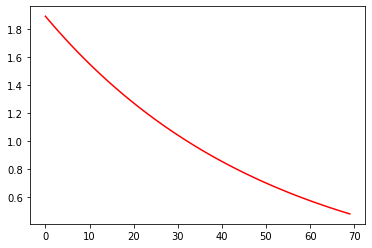

In [33]:
#Veamos la Senda de consumo
plt.plot(consumo_y,"red")

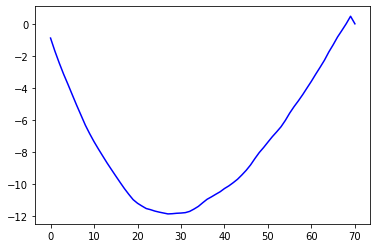

In [34]:
#veamos la senda de ahorro
plt.plot(resultados,"blue")

## Inciso b

In [37]:
A_bound = 0

x0=np.ones(len(A_initvals))

for i in range(len(A_initvals)):
    x0[i]=max(A_bound,A_initvals[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumoy2=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumoy2[0] = A_0*R1+y_sim[0]-consumoy2[0]
    else:
        consumoy2[t] = resultados2[t-1]*R1+y_sim[t]-resultados2[t]

C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


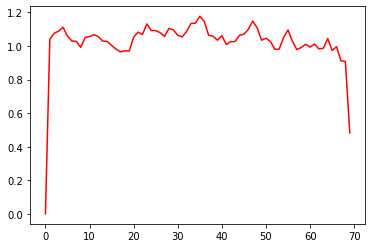

In [38]:
#Veamos la Senda de consumo
plt.plot(consumoy2,"red")

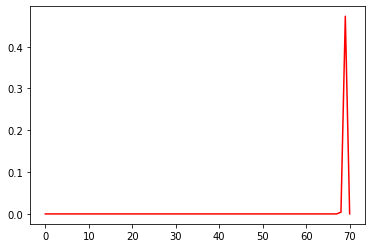

In [39]:
#Veamos la senda de ahorro
plt.plot(resultados2,"red")

# Repita los dos puntos anteriores para 10k realizaciones de Yt

In [40]:
# veamos de primero las 10k realizaciones
iteraciones = 10000 #Numero de simulaciones
simulacion={} #Diccionario vacío donde voy a guardar las sims

X0=A_initvals #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

for k in range(iteraciones): #Loop que me guarda cada realizacion
    
    epsilon=np.random.normal(mediaeps,sigmaeps**2,T)
    y_sim=AR1(rho,mu,y0,T,epsilon)
    
    consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

    for t in range(T):
        if (t==0):
            consumo_y[0] = A_0*R1+y_sim[0]-resultados[0]

        else:
            consumo_y[t] = resultados[t-1]*R1+y_sim[t]-resultados[t]
     
    simulacion[k]=consumo_y

C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [41]:
consumos=[]
for k in simulacion:
    elemento=simulacion[k]
    for i in elemento:
        consumos.append(i)
mat=np.array(consumos).reshape(iteraciones,T) #Creamos una matriz con 70 columnas y el numero de iteraciones

In [42]:
consumo=[]
for i in range(0,T):
    ci=(sum(mat[:,i])/iteraciones)
    consumo.append(ci)
con_med=np.array(consumo)
con_med

array([1.89073093, 1.81301565, 1.74162797, 1.69417657, 1.63590559,
       1.65423928, 1.64941603, 1.61831452, 1.62134739, 1.53168789,
       1.49464911, 1.45487878, 1.43662427, 1.43317699, 1.40609132,
       1.40201222, 1.39593134, 1.38578824, 1.35253454, 1.32859489,
       1.22040342, 1.16596745, 1.15519929, 1.06800398, 1.08355672,
       1.06125825, 1.05032808, 1.05142145, 0.98293288, 0.96926274,
       0.98046749, 0.96928192, 0.91594857, 0.84847353, 0.82870961,
       0.76838786, 0.77998083, 0.84547115, 0.83424262, 0.83983561,
       0.79570317, 0.83082846, 0.79833458, 0.78157314, 0.72842407,
       0.70629007, 0.66094321, 0.59770292, 0.62211468, 0.68207652,
       0.65595072, 0.6610692 , 0.69408618, 0.67994555, 0.59721073,
       0.54029229, 0.59444316, 0.63268552, 0.6086092 , 0.57792671,
       0.58330361, 0.5538059 , 0.57207279, 0.55758569, 0.48866066,
       0.5486035 , 0.51632785, 0.59041885, 0.58023907, 0.53212642])

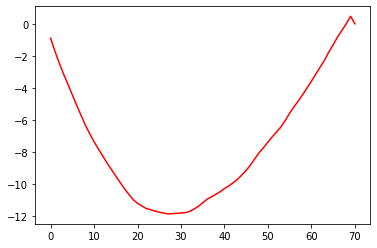

In [43]:
plt.plot(resultados,"red")

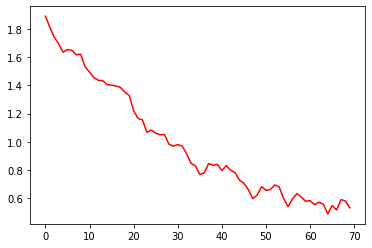

In [44]:
plt.plot(con_med,"red")

## Con PHI=0

In [45]:
A_bound = 0

x0=np.ones(len(A_initvals))

for i in range(len(A_initvals)):
    x0[i]=max(A_bound,A_initvals[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

for k in range(iteraciones): #Loop que me guarda cada realizacion
    
    epsilon=np.random.normal(mediaeps,sigmaeps**2,T)
    y_sim=AR1(rho,mu,y0,T,epsilon)
    
    consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

    for t in range(T):
        if (t==0):
            consumo_y[0] = A_0*R1+y_sim[0]-resultados2[0]

        else:
            consumo_y[t] = resultados2[t-1]*R1+y_sim[t]-resultados2[t]
     
    simulacion[k]=consumo_y

C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\DAVID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [46]:
consumos2=[]
for k in simulacion:
    elemento=simulacion[k]
    for i in elemento:
        consumos2.append(i)
mat2=np.array(consumos2).reshape(iteraciones,T) #Creamos una matriz con 70 columnas y el numero de iteraciones

In [47]:
consumo2=[]
for i in range(0,T):
    ci=(sum(mat2[:,i])/iteraciones)
    consumo2.append(ci)
con_med2=np.array(consumo2)
con_med2

array([1.        , 1.00027286, 1.00044874, 0.99996834, 0.99970923,
       0.99934967, 0.99941491, 0.999408  , 1.00009268, 0.99996735,
       1.00000282, 0.99997392, 1.00028443, 1.00066674, 1.00049089,
       1.0007074 , 0.99997335, 0.99960585, 1.00025365, 1.00008766,
       1.00027475, 1.00029443, 1.00016813, 1.00027654, 1.00010092,
       1.00017653, 1.00046788, 0.99957635, 1.00037903, 0.99999065,
       0.99982245, 0.99991341, 0.99957347, 0.99949862, 0.9995879 ,
       1.00001794, 0.99997181, 1.00019685, 1.00064606, 1.00061221,
       1.00014027, 0.99930877, 0.99914148, 0.99912427, 0.99963216,
       0.99941768, 0.99987414, 1.00005707, 1.00027195, 0.99978107,
       0.99944258, 0.99909237, 0.99944015, 1.00014231, 0.99985446,
       1.00046999, 0.99983164, 0.99948072, 0.99953331, 0.99906589,
       0.99887558, 0.9991771 , 0.99889617, 0.99925665, 0.99970784,
       0.99975448, 0.99949871, 0.99999259, 0.99607243, 0.5314081 ])

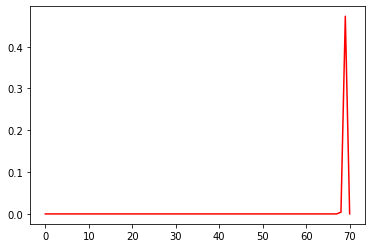

In [48]:
plt.plot(resultados2,"red")

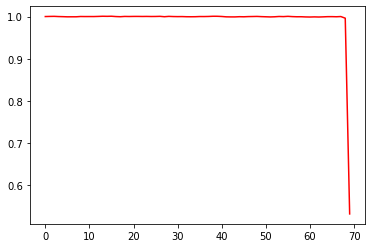

In [49]:
plt.plot(con_med2,"red")